In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


In [2]:
df1=pd.read_csv(r"CREDIT CARD USERS DATA.csv")
df=df1.copy()
df.head()

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [3]:
df.shape

(5000, 132)

In [4]:
df.replace(to_replace="#NULL!",value=np.nan,inplace=True)

In [5]:
df.isnull().sum().any()

True

In [6]:
null_data = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['Total_Null'])

In [7]:
null_data['percentage'] = (df.isnull().sum().sort_values(ascending=False)/df.shape[0]) * 100

null_data.head(15)

,Total_Null,percentage
lnwireten,3656,73.12
lnwiremon,3656,73.12
lnequipmon,3296,65.92
lnequipten,3296,65.92
lntollten,2622,52.44
lntollmon,2622,52.44
lncardten,1422,28.44
lncardmon,1419,28.38
lnlongten,3,0.06
longten,3,0.06


In [8]:
# now we would be removing the columns having more than 50 % missing values

In [9]:
df.drop(['lnwireten','lnwiremon','lnequipmon','lnequipten','lntollten','lntollmon'],axis=1,inplace=True)

In [10]:
df.shape

(5000, 126)

In [11]:
from sklearn.preprocessing import Imputer

imp_mean = Imputer(np.nan,'mean')
imp_mean.fit(df[['lncardten']])
df['lncardten'] = imp_mean.transform(df[['lncardten']])
imp_mean.fit(df[['lncardmon']])
df['lncardmon'] = imp_mean.fit_transform(df[['lncardmon']])

In [12]:
a=pd.DataFrame()
a['total_null'] = df.isnull().sum().sort_values(ascending=False)
a['percentage'] = (df.isnull().sum().sort_values(ascending=False)/df.shape[0]) * 100
a.head(10)

,total_null,percentage
lnlongten,3,0.06
longten,3,0.06
townsize,2,0.04
cardten,2,0.04
commutetime,2,0.04
lncreddebt,1,0.02
lnothdebt,1,0.02
response_03,0,0.00
addresscat,0,0.00
carown,0,0.00


In [13]:
#now only these much columns are left and hence we can remove these rows directly 

In [14]:
df.dropna(inplace=True)
df.isnull().sum().any()

False

In [15]:
#hence we removed all the missing values 

In [16]:
for x in df.columns:
    print("{} : {}".format(x,df[x].dtypes))

custid : object
region : float64
townsize : object
gender : float64
age : float64
agecat : float64
birthmonth : object
ed : float64
edcat : float64
jobcat : float64
union : float64
employ : float64
empcat : float64
retire : float64
income : float64
lninc : float64
inccat : float64
debtinc : float64
creddebt : float64
lncreddebt : object
othdebt : float64
lnothdebt : object
default : float64
jobsat : float64
marital : float64
spoused : float64
spousedcat : float64
reside : float64
pets : float64
pets_cats : float64
pets_dogs : float64
pets_birds : float64
pets_reptiles : float64
pets_small : float64
pets_saltfish : float64
pets_freshfish : float64
homeown : float64
hometype : float64
address : float64
addresscat : float64
cars : float64
carown : float64
cartype : float64
carvalue : float64
carcatvalue : float64
carbought : float64
carbuy : float64
commute : float64
commutecat : float64
commutetime : object
commutecar : float64
commutemotorcycle : float64
commutecarpool : float64
commute

In [17]:
df.index = df.custid
df.drop(['custid'],axis=1,inplace=True)

df.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
df.select_dtypes(include='object').head()

,townsize,birthmonth,lncreddebt,lnothdebt,commutetime,longten,lnlongten,cardten
custid,,,,,,,,
3964-QJWTRG-NPN,2.00,September,0.18,0.81,22.00,34.40,3.54,60.00
0648-AIPJSP-UVM,5.00,May,0.20,0.45,29.00,330.60,5.80,610.00
5195-TLUDJE-HVO,4.00,June,-0.07,0.93,24.00,1858.35,7.53,1410.00
4459-VLPQUH-3OL,3.00,May,-3.78,0.11,38.00,199.45,5.30,685.00
8158-SMTQFB-CNO,2.00,July,-1.54,-1.74,32.00,74.10,4.31,360.00


In [19]:
df=pd.concat([df,pd.get_dummies(df['birthmonth'],prefix='birthmonth')],axis=1)

In [20]:
df.drop('birthmonth',axis=1,inplace=True)

In [21]:
df['townsize']    = pd.to_numeric(df['townsize'])
df['lncreddebt']  = pd.to_numeric(df['lncreddebt'])
df['lnothdebt']   = pd.to_numeric(df['lnothdebt'])
df['commutetime'] = pd.to_numeric(df['commutetime'])
df['longten']     = pd.to_numeric(df['longten'])
df['lnlongten']   = pd.to_numeric(df['lnlongten'])
df['cardten']     = pd.to_numeric(df['cardten']) 

In [22]:
df.select_dtypes(include='object').head()

""
custid
3964-QJWTRG-NPN
0648-AIPJSP-UVM
5195-TLUDJE-HVO
4459-VLPQUH-3OL
8158-SMTQFB-CNO


In [23]:
df.shape

(4994, 136)

In [24]:
#hence all the categorical columns were handled

In [25]:
# now handling outliers

In [26]:
df['total_cardspent']=df['cardspent']+df['card2spent']
df.drop(['cardspent','card2spent'],axis=1,inplace=True)

In [27]:
def var_summary(x):
   return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                 index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=df.apply(lambda x: var_summary(x)).T

In [28]:
num_summary.to_csv("oulier.csv")

In [29]:
outlier=pd.read_csv("oulier.csv")
outlier[outlier['Unnamed: 0']=="total_cardspent"]

,Unnamed: 0,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
134,total_cardspent,4994.0,0.0,2487486.4,498.094994,414.25,351.615513,123633.468708,8.11,58.1832,133.082,183.931,276.325,414.25,615.8675,907.755,1145.3655,1760.6568,4881.05


In [30]:
df.loc[:,['hourstv','wireten','wiremon','cardmon','equipten','equipmon','tollten','tollmon','longten','longmon','total_cardspent','othdebt','creddebt','income']].head()

,hourstv,wireten,wiremon,cardmon,equipten,equipmon,tollten,tollmon,longten,longmon,total_cardspent,othdebt,creddebt,income
custid,,,,,,,,,,,,,,
3964-QJWTRG-NPN,13.0,0.00,0.00,14.25,126.1,29.50,161.05,29.0,34.40,6.50,149.46,2.24,1.20,31.0
0648-AIPJSP-UVM,18.0,1683.55,45.65,16.00,1975.0,54.85,0.00,0.0,330.60,8.90,77.54,1.57,1.22,15.0
5195-TLUDJE-HVO,21.0,0.00,0.00,23.00,0.0,0.00,0.00,0.0,1858.35,28.40,359.97,2.54,0.93,35.0
4459-VLPQUH-3OL,26.0,0.00,0.00,21.00,0.0,0.00,0.00,0.0,199.45,6.00,359.41,1.12,0.02,20.0
8158-SMTQFB-CNO,27.0,410.80,19.05,17.25,0.0,0.00,387.70,16.5,74.10,3.05,507.83,0.18,0.21,23.0


In [31]:
oulier_columns=['hourstv','wireten','wiremon','cardmon','equipten','equipmon','tollten','tollmon','longten','longmon','total_cardspent','othdebt','creddebt','income']
for x in df.columns:
    df[x]=df[x].clip_upper(df[x].quantile(0.99))
    df[x]=df[x].clip_lower(df[x].quantile(0.01))

In [32]:
new=df.apply(lambda x: var_summary(x)).T
new.to_csv("new1.csv")

In [33]:
pd.read_csv(r"new1.csv")

,Unnamed: 0,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
0,region,4994.0,0.0,14984.000,3.000400,3.00,1.421559,2.020829,1.0000,1.000000,1.0000,1.000,2.000,3.00,4.0000,5.000,5.0000,5.000000,5.0000
1,townsize,4994.0,0.0,13418.000,2.686824,3.00,1.426354,2.034487,1.0000,1.000000,1.0000,1.000,1.000,3.00,4.0000,5.000,5.0000,5.000000,5.0000
2,gender,4994.0,0.0,2515.000,0.503604,1.00,0.500037,0.250037,0.0000,0.000000,0.0000,0.000,0.000,1.00,1.0000,1.000,1.0000,1.000000,1.0000
3,age,4994.0,0.0,234909.000,47.038246,47.00,17.764260,315.568936,18.0000,18.000000,20.0000,23.000,31.000,47.00,62.0000,72.000,76.0000,79.000000,79.0000
4,agecat,4994.0,0.0,21174.000,4.239888,4.00,1.308174,1.711319,2.0000,2.000000,2.0000,2.000,3.000,4.00,5.0000,6.000,6.0000,6.000000,6.0000
5,ed,4994.0,0.0,72639.000,14.545254,14.00,3.243020,10.517179,8.0000,8.000000,9.0000,10.000,12.000,14.00,17.0000,19.000,20.0000,21.000000,21.0000
6,edcat,4994.0,0.0,13346.000,2.672407,2.00,1.211969,1.468868,1.0000,1.000000,1.0000,1.000,2.000,2.00,4.0000,4.000,5.0000,5.000000,5.0000
7,jobcat,4994.0,0.0,13740.000,2.751302,2.00,1.737368,3.018449,1.0000,1.000000,1.0000,1.000,1.000,2.00,4.0000,6.000,6.0000,6.000000,6.0000
8,union,4994.0,0.0,755.000,0.151181,0.00,0.358261,0.128351,0.0000,0.000000,0.0000,0.000,0.000,0.00,0.0000,1.000,1.0000,1.000000,1.0000
9,employ,4994.0,0.0,48441.000,9.699840,7.00,9.582775,91.829573,0.0000,0.000000,0.0000,0.000,2.000,7.00,15.0000,25.000,31.0000,39.000000,39.0000


In [34]:
df.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,total_cardspent
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,1.0,2.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,149.46
0648-AIPJSP-UVM,5.0,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,77.54
5195-TLUDJE-HVO,3.0,4.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,359.97
4459-VLPQUH-3OL,4.0,3.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.41
8158-SMTQFB-CNO,2.0,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,507.83


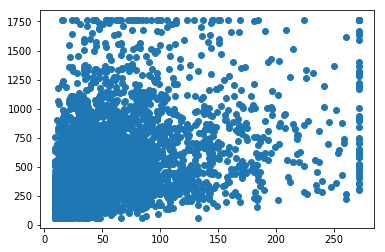

In [35]:
plt.scatter(df['income'],df['total_cardspent'])

In [36]:
df.columns

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat',
       'jobcat', 'union', 'employ',
       ...
       'birthmonth_February', 'birthmonth_January', 'birthmonth_July',
       'birthmonth_June', 'birthmonth_March', 'birthmonth_May',
       'birthmonth_November', 'birthmonth_October', 'birthmonth_September',
       'total_cardspent'],
      dtype='object', length=135)

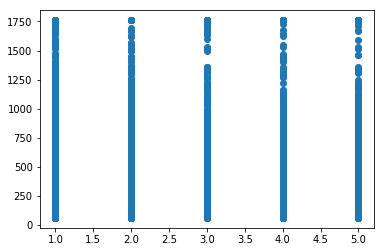

In [37]:
plt.scatter(df['townsize'],df['total_cardspent'])

In [38]:
X=df.drop(['total_cardspent'],axis=1)
y=df.loc[:,'total_cardspent']

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
X.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,1.0,2.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0648-AIPJSP-UVM,5.0,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5195-TLUDJE-HVO,3.0,4.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4459-VLPQUH-3OL,4.0,3.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8158-SMTQFB-CNO,2.0,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
variables=list(range(X.shape[1]))
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in range(X.iloc[:, variables].shape[1])]
vif['column'] = X.columns

In [42]:
vif.shape

(134, 2)

In [43]:
a=[]
for x in vif[vif['vif']>10].column:
    a.append(x)

In [44]:
a

['age',
 'agecat',
 'ed',
 'edcat',
 'income',
 'lninc',
 'inccat',
 'marital',
 'spoused',
 'spousedcat',
 'pets',
 'pets_freshfish',
 'addresscat',
 'carvalue',
 'commute',
 'commutecat',
 'cardtenure',
 'cardtenurecat',
 'card2tenure',
 'card2tenurecat',
 'tenure',
 'longmon',
 'lnlongmon',
 'longten',
 'lnlongten',
 'tollmon',
 'tollten',
 'equip',
 'equipmon',
 'callcard',
 'cardmon',
 'lncardmon',
 'cardten',
 'wiremon',
 'wireten',
 'birthmonth_April',
 'birthmonth_August',
 'birthmonth_December',
 'birthmonth_February',
 'birthmonth_January',
 'birthmonth_July',
 'birthmonth_June',
 'birthmonth_March',
 'birthmonth_May',
 'birthmonth_November',
 'birthmonth_October',
 'birthmonth_September']

In [45]:
X.drop(a,axis=1,inplace=True)

In [46]:
X.shape

(4994, 87)

In [47]:
X.head()

,region,townsize,gender,jobcat,union,employ,empcat,retire,debtinc,creddebt,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,11.1,1.20,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
0648-AIPJSP-UVM,5.0,5.0,0.0,2.0,0.0,0.0,1.0,0.0,18.6,1.22,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
5195-TLUDJE-HVO,3.0,4.0,1.0,2.0,0.0,16.0,5.0,0.0,9.9,0.93,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4459-VLPQUH-3OL,4.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,5.7,0.03,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
8158-SMTQFB-CNO,2.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,1.7,0.21,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [48]:
y.head()

custid
3964-QJWTRG-NPN    149.46
0648-AIPJSP-UVM     77.54
5195-TLUDJE-HVO    359.97
4459-VLPQUH-3OL    359.41
8158-SMTQFB-CNO    507.83
Name: total_cardspent, dtype: float64

In [49]:
from scipy.stats import boxcox

y,_=boxcox(y)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scale=StandardScaler()

In [52]:
scaled_X = pd.DataFrame(scale.fit_transform(X),columns=X.columns)

In [53]:
scaled_X.head()

,region,townsize,gender,jobcat,union,employ,empcat,retire,debtinc,creddebt,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,-1.407329,-0.481572,0.992817,-1.008121,2.369508,-1.012318,-1.330535,-0.416085,0.190293,-0.234960,...,-3.729271,-0.501626,-1.313767,1.042136,1.051378,-0.466321,-0.947321,-0.302235,2.587453,-0.337986
1,1.406766,1.621902,-1.007235,-0.432480,-0.422028,-1.012318,-1.330535,-0.416085,1.392542,-0.226563,...,0.268149,1.993515,0.761170,1.042136,1.051378,2.144447,1.055609,-0.302235,-0.386480,-0.337986
2,-0.000282,0.920744,0.992817,-0.432480,-0.422028,0.657512,1.423171,-0.416085,-0.002067,-0.348325,...,0.268149,-0.501626,-1.313767,-0.959567,-0.951132,-0.466321,1.055609,-0.302235,-0.386480,-0.337986
3,0.703242,0.219586,-1.007235,-0.432480,-0.422028,-1.012318,-1.330535,-0.416085,-0.675327,-0.726206,...,0.268149,-0.501626,0.761170,1.042136,1.051378,-0.466321,1.055609,3.308681,-0.386480,-0.337986
4,-0.703805,-0.481572,-1.007235,-0.432480,-0.422028,-0.907953,-1.330535,-0.416085,-1.316526,-0.650629,...,0.268149,-0.501626,0.761170,-0.959567,1.051378,-0.466321,-0.947321,-0.302235,2.587453,-0.337986


In [54]:
from sklearn.cross_validation import train_test_split

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
from sklearn import metrics

In [58]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
y_pred=lr.predict(X_train)

In [60]:
metrics.mean_squared_error(y_train,y_pred)

0.8507217088807416

In [61]:
metrics.r2_score(y_train,y_pred)

0.6316443699558532

In [62]:
predicted=pd.DataFrame()
predicted['actual']=y_train
predicted['predicted']=y_pred

predicted

,actual,predicted
0,8.824978,9.343262
1,10.046416,10.884580
2,8.983223,9.083202
3,10.149024,10.446496
4,11.075083,11.260415
5,8.031576,9.474590
6,10.319484,11.168761
7,9.574287,10.294856
8,10.180760,10.393322
9,9.273976,9.930599


((array([-3.56050816, -3.32053721, -3.18803395, ...,  3.18803395,
          3.32053721,  3.56050816]),
  array([-3.77185576, -3.52398269, -3.49350197, ...,  2.4787988 ,
          2.64306079,  2.92930035])),
 (0.9180520837493219, -1.138638567872608e-15, 0.9944849426365887))

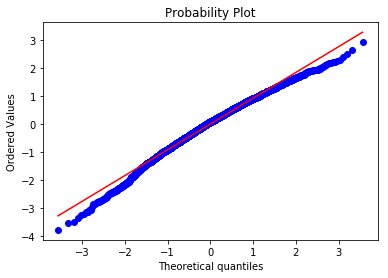

In [63]:
stats.probplot(y_pred-y_train,dist='norm',plot=plt)

In [64]:
lr.fit(X_test,y_test)
y_pred_test = lr.predict(X_test)

In [65]:
metrics.mean_squared_error(y_test,y_pred_test)

0.8433085813497119

In [66]:
metrics.r2_score(y_test,y_pred_test)

0.6278364916504235

((array([-3.26114942, -3.00072598, -2.85570187, ...,  2.85570187,
          3.00072598,  3.26114942]),
  array([-3.58214405, -3.36010398, -3.1064693 , ...,  2.25466449,
          2.48944151,  2.68963813])),
 (0.9131484328196693, 1.4405457513995675e-15, 0.992097021913604))

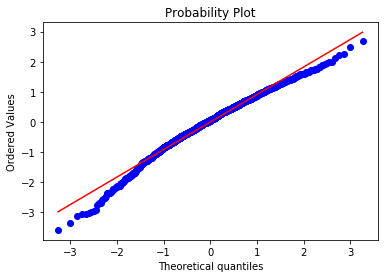

In [67]:
stats.probplot(y_pred_test-y_test,dist='norm',plot=plt)